In [86]:
import pandas as pd

In [87]:
train = pd.read_csv('train.csv')

In [88]:
y_train = train["label"]
#y_train.head(5)

In [89]:
train.drop(columns = 'label',axis =1, inplace = True)
#train.head()

In [90]:
test = pd.read_csv('test.csv')
#test.head(5)

In [91]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

C:\Users\Rucha\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

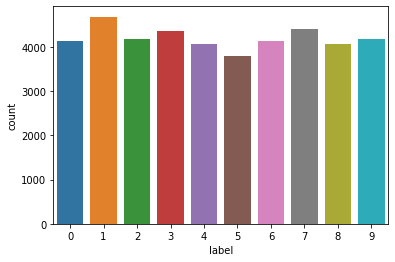

In [92]:
import seaborn as sns
sns.countplot(y_train)

In [93]:
train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [94]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [95]:
train = train/255.0
test = test/255.0

In [96]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
train.shape

(42000, 28, 28, 1)

In [97]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_train.shape

(42000, 10)

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val= train_test_split(train, y_train, test_size = 0.1, random_state = 101)

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.imshow(x_train[1][:,:,0])
x_val.shape

(4200, 28, 28, 1)

In [104]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [105]:
model = Sequential()

#layer1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

#layer2
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)       

In [106]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [111]:
lr_callback = ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, min_lr=0.00001) 

In [112]:
datagen = ImageDataGenerator(
        featurewise_center=False,  				
        samplewise_center=False,  				
        featurewise_std_normalization=False,
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=10, 
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [113]:
datagen.fit(x_train)

In [114]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = 86), epochs = 30, validation_data=(x_val,y_val), verbose = 2, steps_per_epoch= x_train.shape[0]//86, callbacks=[lr_callback])

Epoch 1/30
439/439 - 129s - loss: 0.0938 - accuracy: 0.9739 - val_loss: 0.0627 - val_accuracy: 0.9843
Epoch 2/30
439/439 - 134s - loss: 0.0762 - accuracy: 0.9786 - val_loss: 0.0537 - val_accuracy: 0.9855
Epoch 3/30
439/439 - 133s - loss: 0.0711 - accuracy: 0.9795 - val_loss: 0.0370 - val_accuracy: 0.9895
Epoch 4/30
439/439 - 128s - loss: 0.0710 - accuracy: 0.9807 - val_loss: 0.0541 - val_accuracy: 0.9852
Epoch 5/30
439/439 - 128s - loss: 0.0659 - accuracy: 0.9809 - val_loss: 0.0370 - val_accuracy: 0.9912
Epoch 6/30
439/439 - 128s - loss: 0.0595 - accuracy: 0.9835 - val_loss: 0.0286 - val_accuracy: 0.9924
Epoch 7/30
439/439 - 128s - loss: 0.0572 - accuracy: 0.9842 - val_loss: 0.0309 - val_accuracy: 0.9917
Epoch 8/30
439/439 - 666s - loss: 0.0503 - accuracy: 0.9853 - val_loss: 0.0314 - val_accuracy: 0.9924
Epoch 9/30
439/439 - 141s - loss: 0.0513 - accuracy: 0.9861 - val_loss: 0.0325 - val_accuracy: 0.9910

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
E

In [117]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


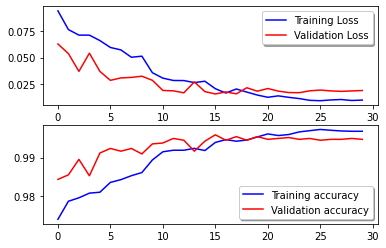

In [127]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],color = 'b', label = "Training Loss")
ax[0].plot(history.history['val_loss'],color = 'r', label = "Validation Loss")
legend = ax[0].legend(loc = 'best', shadow = True)

ax[1].plot(history.history['accuracy'],color = 'b', label = "Training accuracy")
ax[1].plot(history.history['val_accuracy'],color = 'r', label = "Validation accuracy")
legend = ax[1].legend(loc = 'best', shadow = True)

In [128]:
results = model.predict(test)

In [130]:
import numpy as np
results = np.argmax(results, axis=1)

In [131]:
results = pd.Series(results, name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), results], axis =1)
submission.to_csv("digit_recognizer_result.csv", index=False)

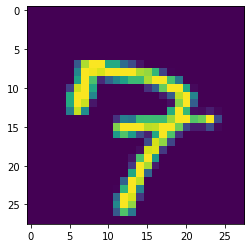

In [144]:
plt.imshow(test[5][:,:,0])

In [145]:
results[5]

7